In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname("__file__")), '..'))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from utils import data_handling, model_assessment
from ipywidgets import interact

## Setup visualization settings

In [2]:
plt.style.use('seaborn-paper')
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 1000
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.major.size'] = 15
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 1.0
minor_locator = AutoMinorLocator(4)

## Load and prepare test data

In [3]:
cell_images, cell_labels, cell_types = data_handling.load_data_from_file('../data/labels.csv')

train_test_split = int(0.85 * cell_images.shape[0])
X_test, Y_test, Z_test = \
    cell_images[train_test_split : ], \
    cell_labels[train_test_split : ], cell_types[train_test_split : ]
X_test, Y_test, Z_test = data_handling.preprocess_data(X_test, Y_test, Z_test)

## Assess reconstruction models' capability

1/1 [==============================] - 0s 417ms/step
1.0
0.1003


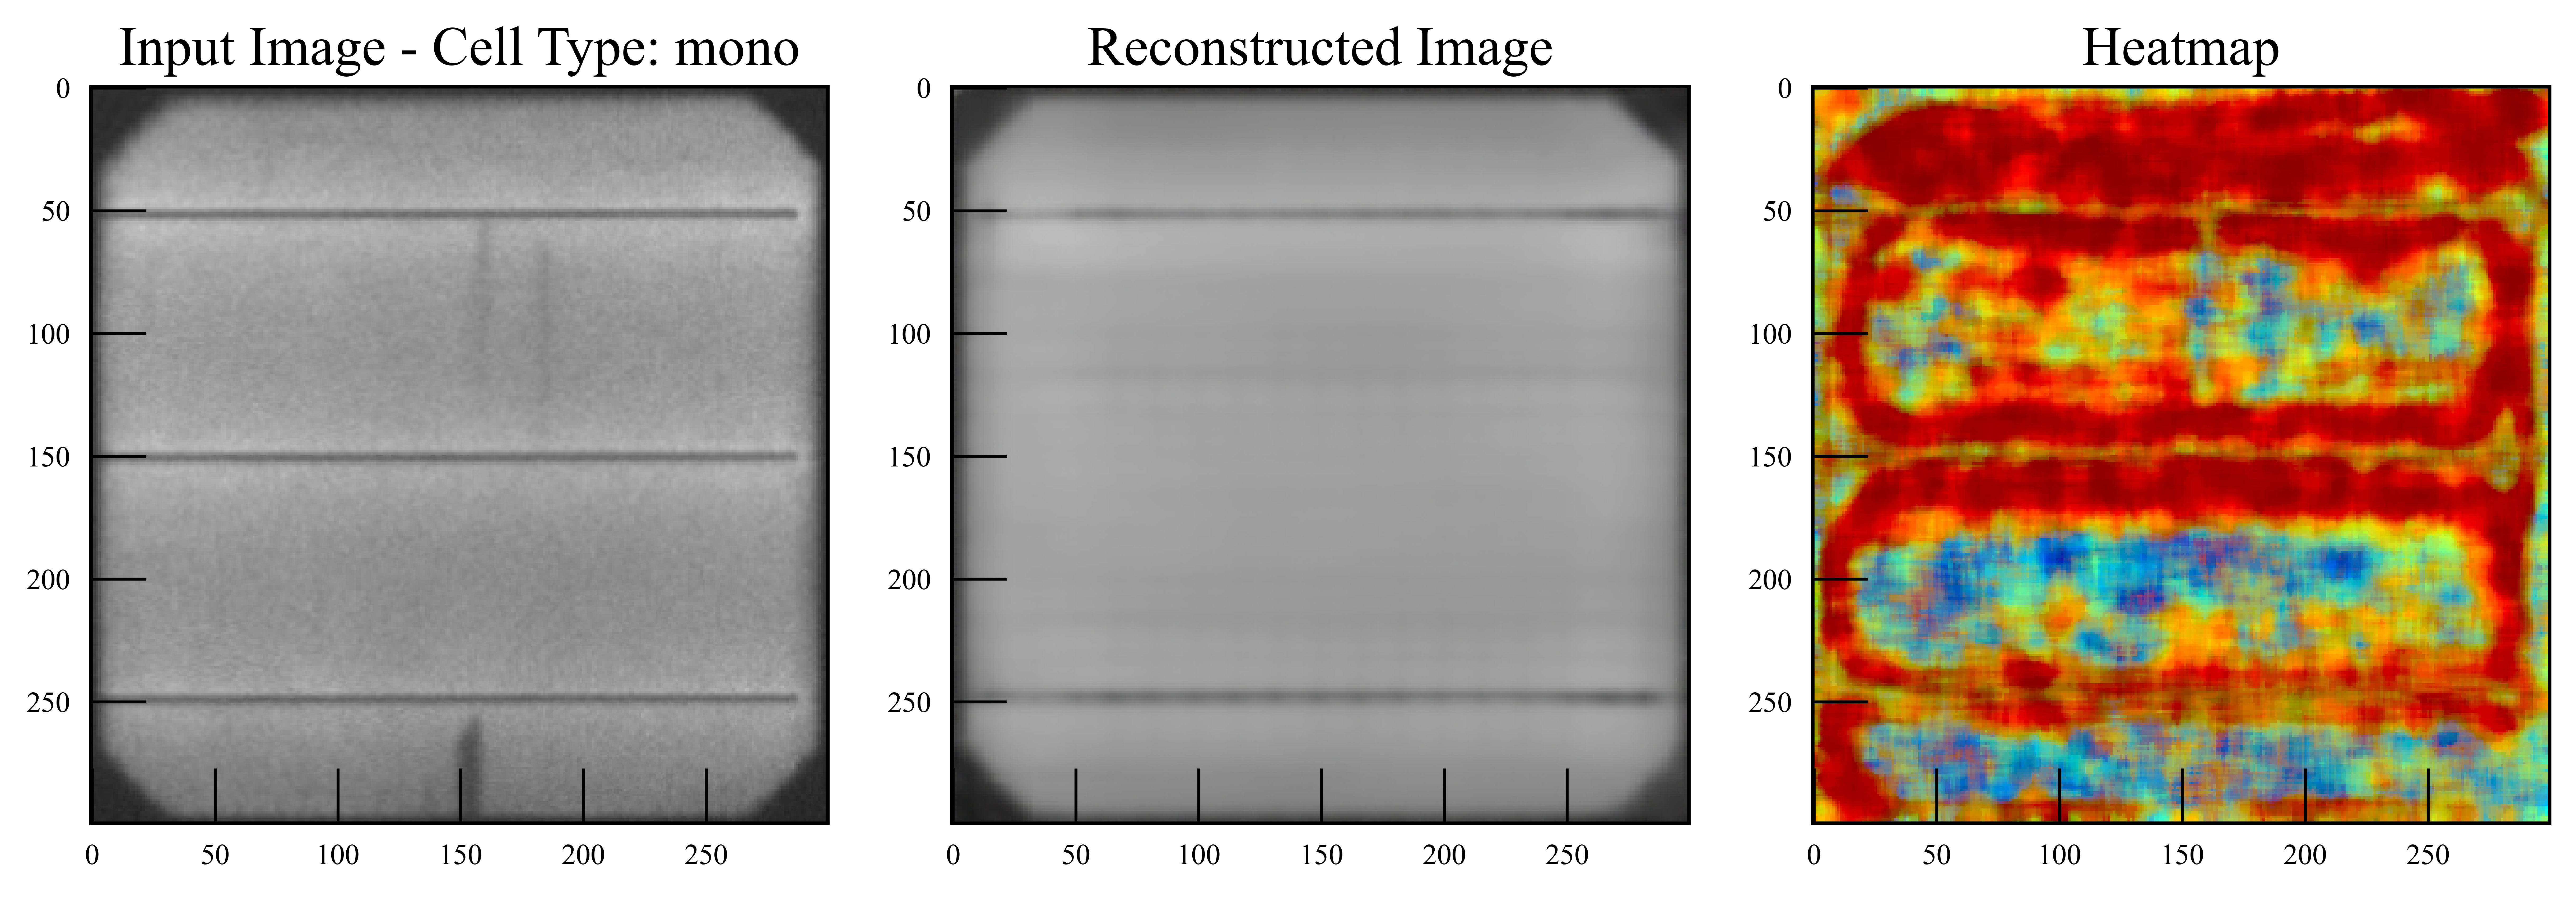

In [9]:
n = 101
target_image = X_test[n]
heatmap , reconstructed_image, score = \
    model_assessment.compute_heatmap('../models/weights/CAE_VGG19_1.00.00_ss.hdf5', target_image)
print(Y_test[n])
print(score)
fig, axs = plt.subplots(1, 3, figsize = (10, 5))
axs[0].imshow(target_image)
axs[0].set_title(f'Input Image - Cell Type: {Z_test[n]}')
axs[1].imshow(reconstructed_image[0].astype('uint8'))
axs[1].set_title(f'Reconstructed Image')
axs[2].imshow(heatmap, cmap = 'jet')
axs[2].set_title(f'Heatmap')
plt.tight_layout()

